TIC ID for tau Boo is 72506701


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


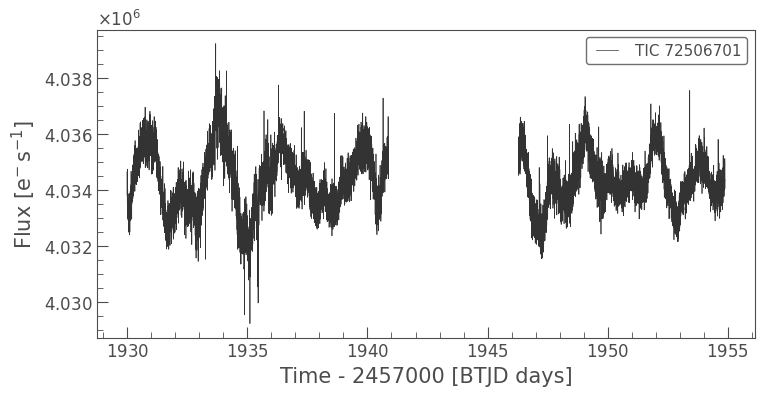

In [1]:
from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "tau Boo"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")


[1928.11006426 1928.11145319 1928.11284211 ... 1954.875607   1954.87838474
 1954.87977361]


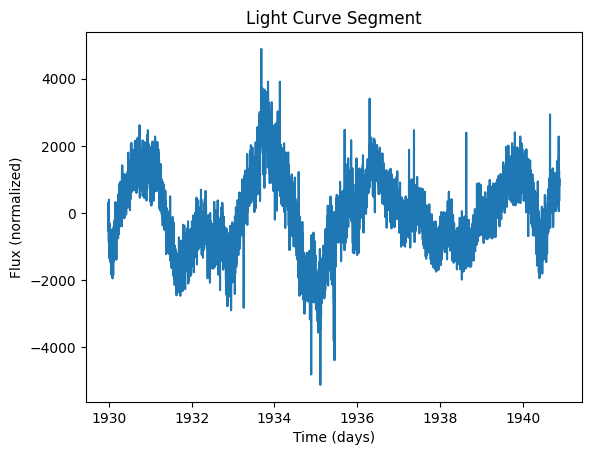

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1928
t_end = 1941

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]



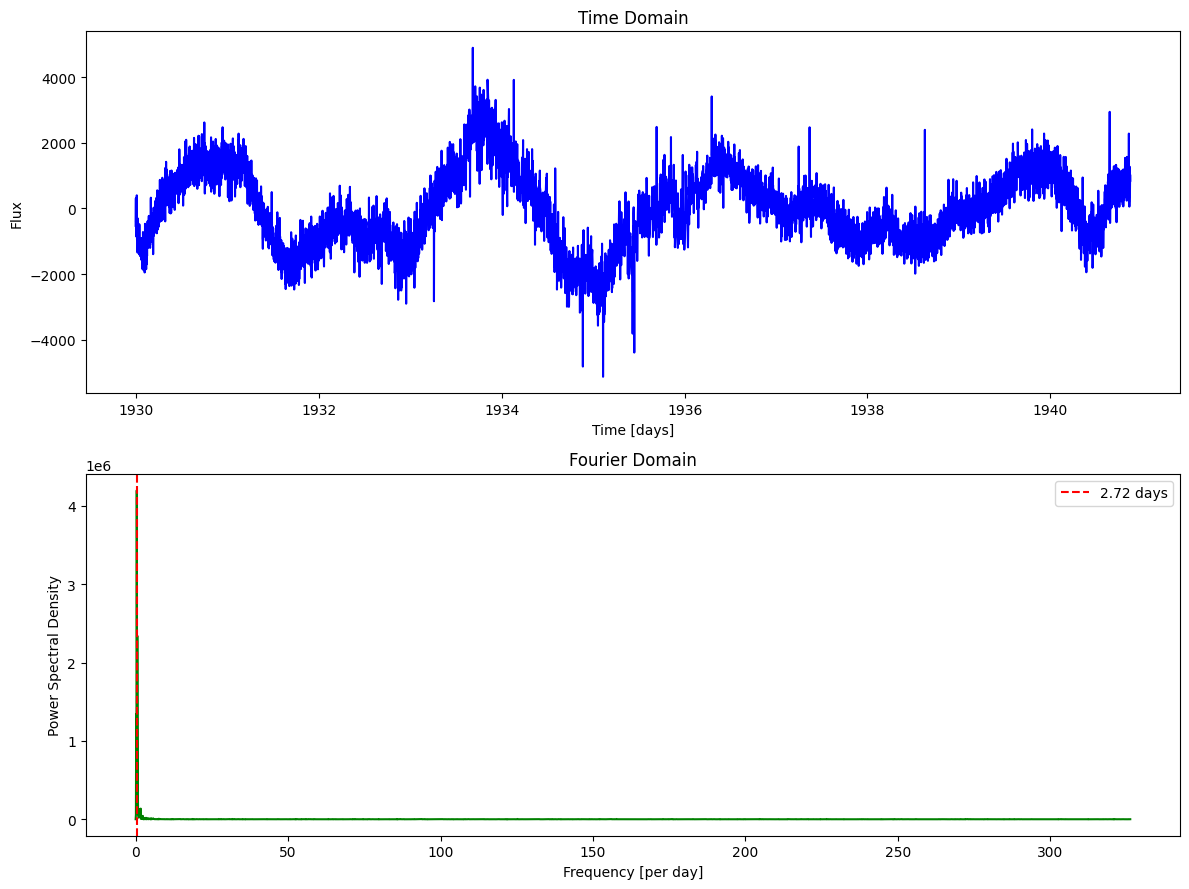

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].plot(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


In [17]:
print(Tobs)

10.882161462777276


In [18]:
from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "GJ 182"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")


TIC ID for GJ 182 is 452763353


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 12 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


[1437.98402564 1437.98541458 1437.98680353 ... 1464.2870969  1464.28848577
 1464.29126353]


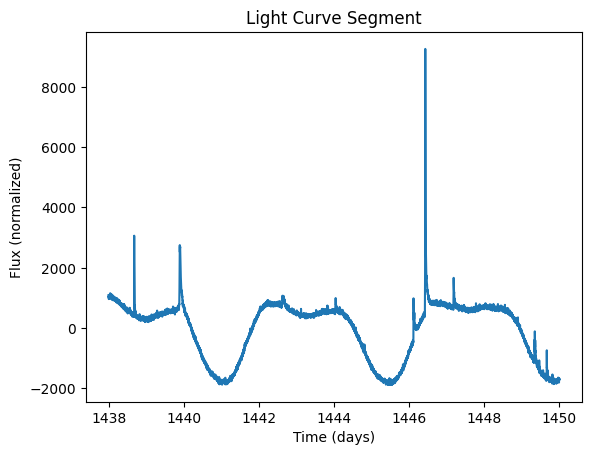

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1437
t_end = 1450

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]



In [22]:
print(np.min(time))
print(np.max(time))

1437.9895814101644
1449.9995762178926


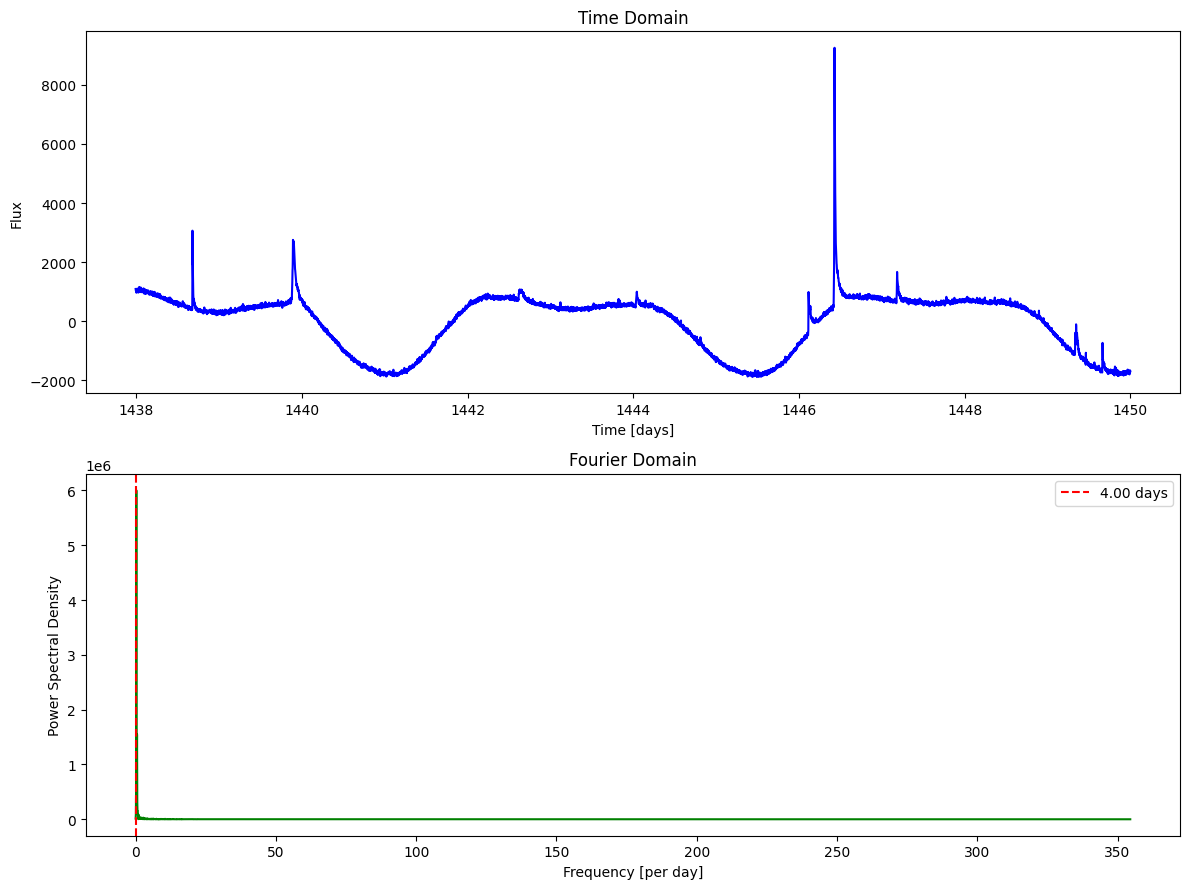

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].plot(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


In [24]:
print(Tobs)

12.009994807728162


In [25]:
GJ 49

SyntaxError: invalid syntax (2380877479.py, line 1)

In [26]:
from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "GJ 49"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")


TIC ID for GJ 49 is 256419669


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


[1790.66035008 1790.66173898 1790.66312788 ... 1815.03097861 1815.03236747
 1815.03375633]


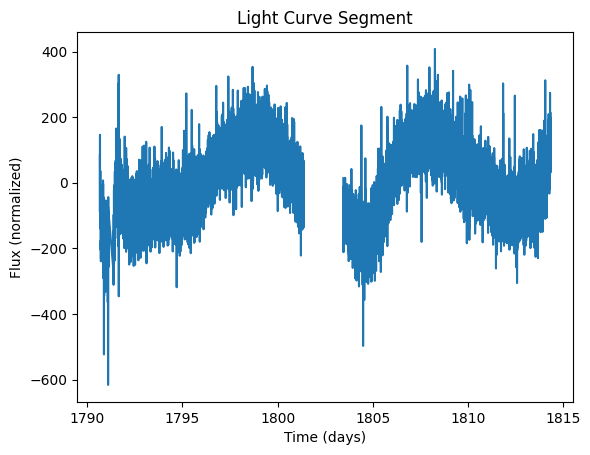

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1790
t_end = 1815

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]



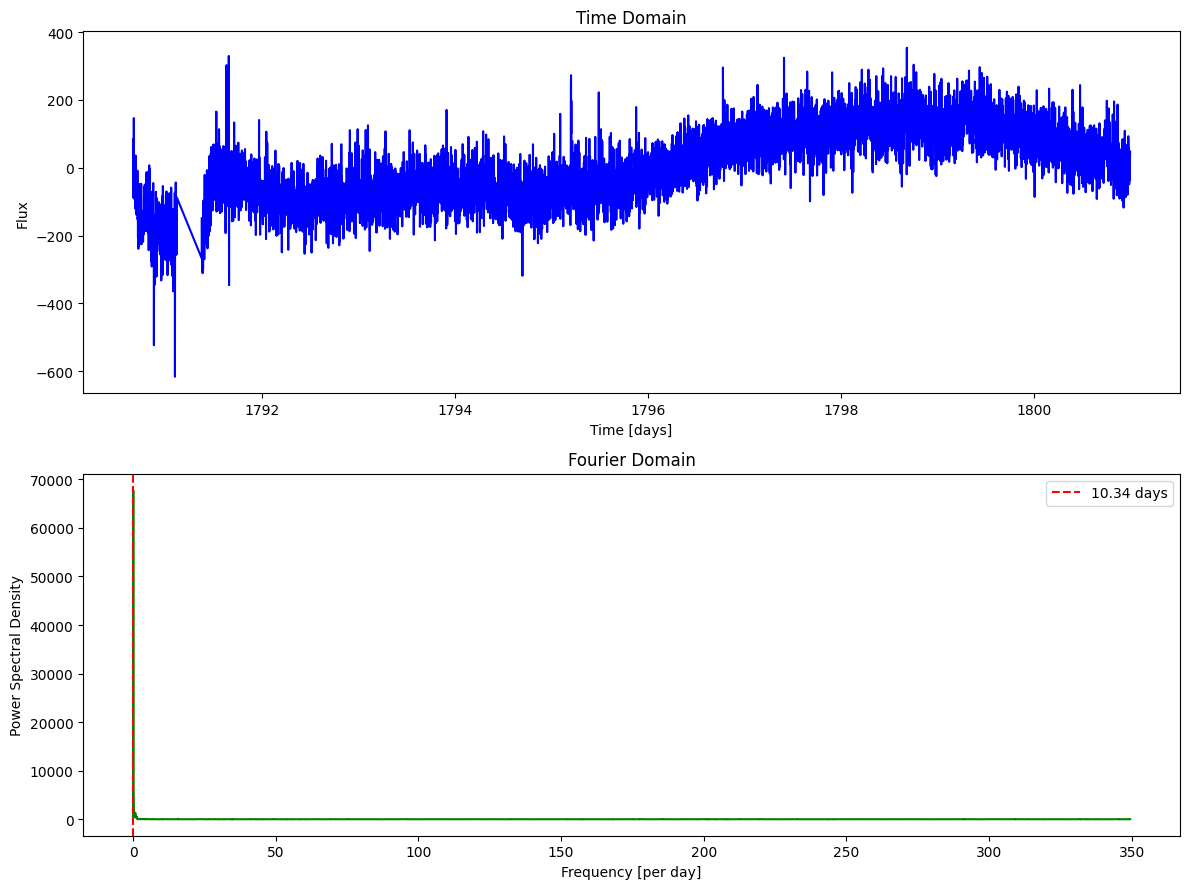

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].plot(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


In [33]:
print(Tobs)

10.338877915367448


In [34]:
from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "AD Leo"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")


TIC ID for AD Leo is 95431305


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 16 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


[2525.50640184 2525.50663334 2525.50686485 ... 2550.62600221 2550.62623371
 2550.62646521]


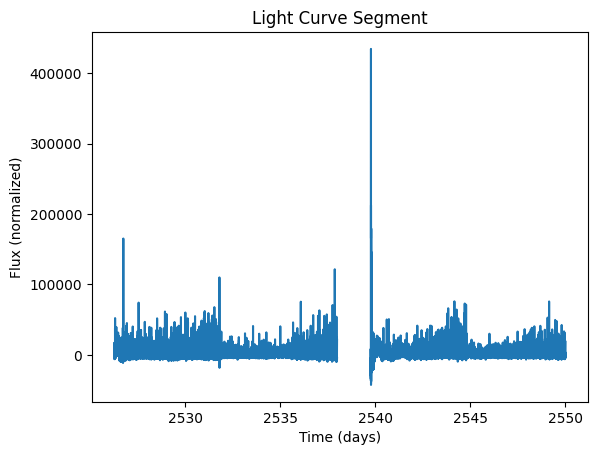

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 2526
t_end = 2550

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]



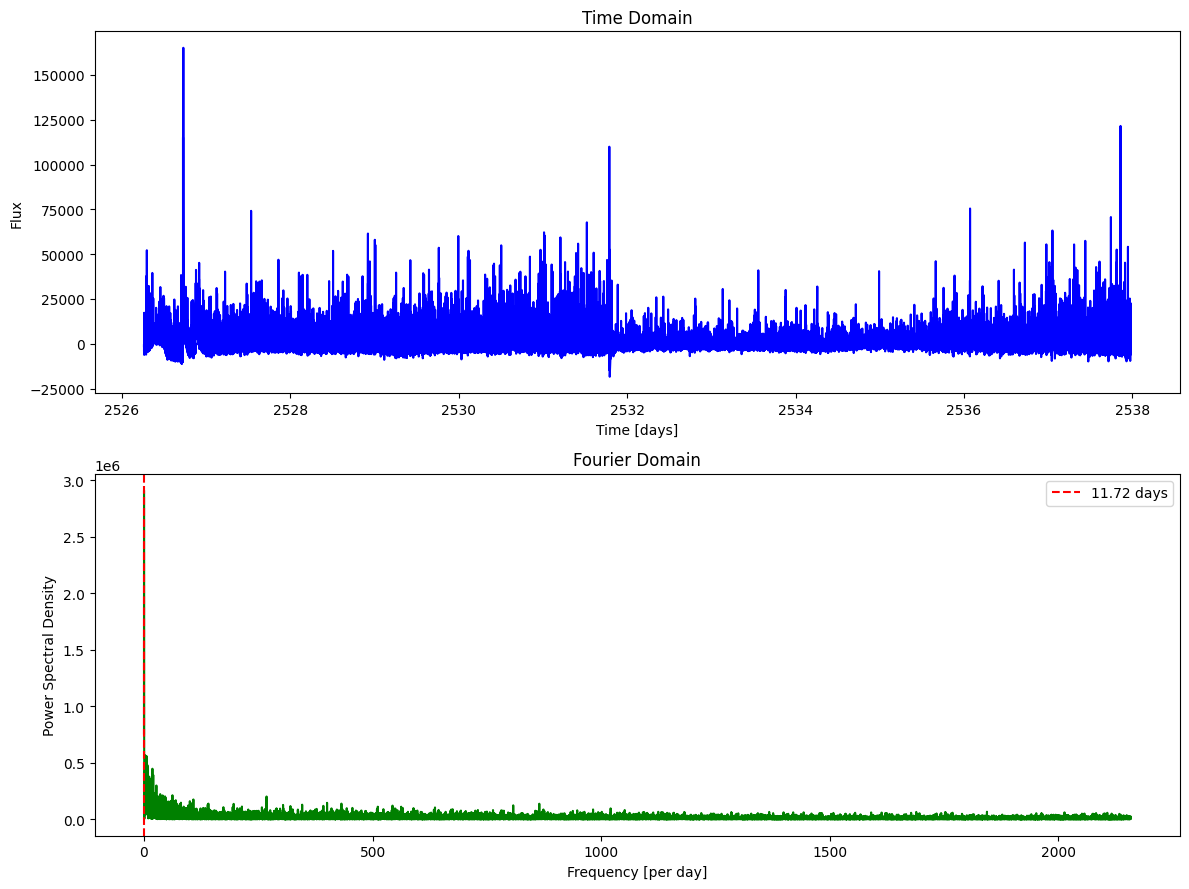

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].plot(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


In [41]:
print(Tobs)

11.718744256008904


In [46]:
from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "HD  72905"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")


TIC ID for HD  72905 is 417762326


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 14 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


[1842.50768966 1842.50907858 1842.51046751 ... 1868.82316459 1868.82455346
 1868.82594234]


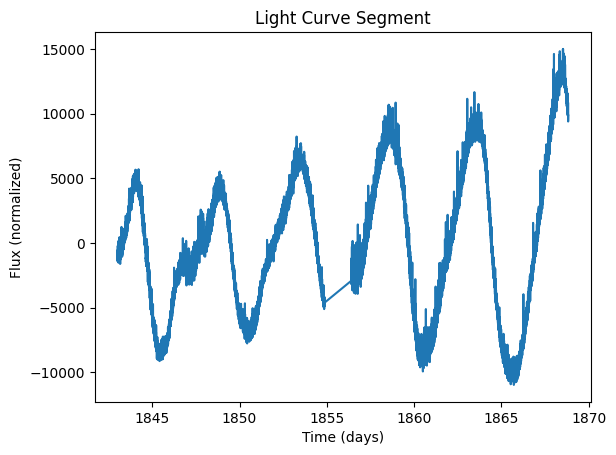

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1843
t_end = 1900

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]



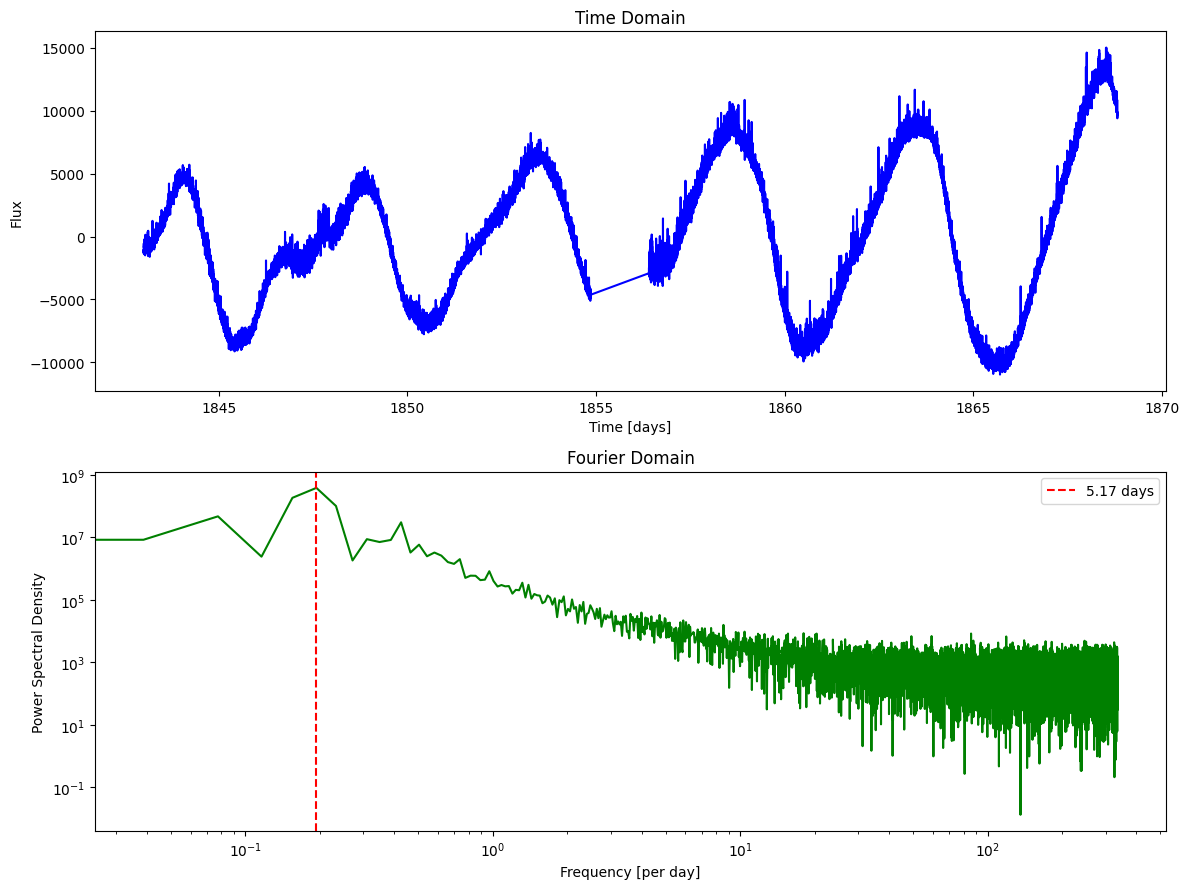

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


In [51]:
print(Tobs)

10.998792262722873


In [28]:
from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "HD 8907 "

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")


TIC ID for HD 8907  is 191770861


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 11 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


[1764.68903515 1764.69042409 1764.69181303 ... 1789.69632232 1789.69771122
 1789.69910011]


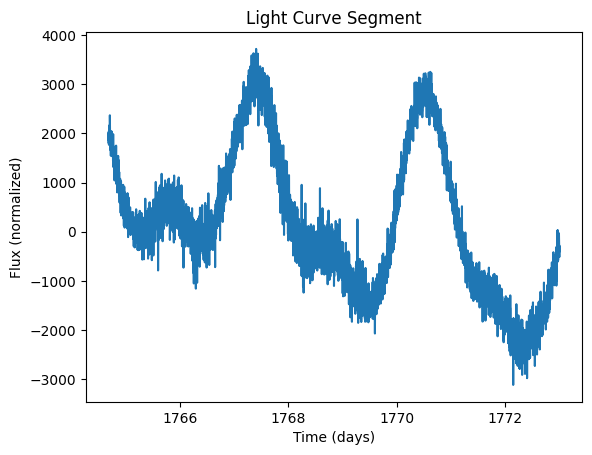

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1764
t_end = 1773

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]



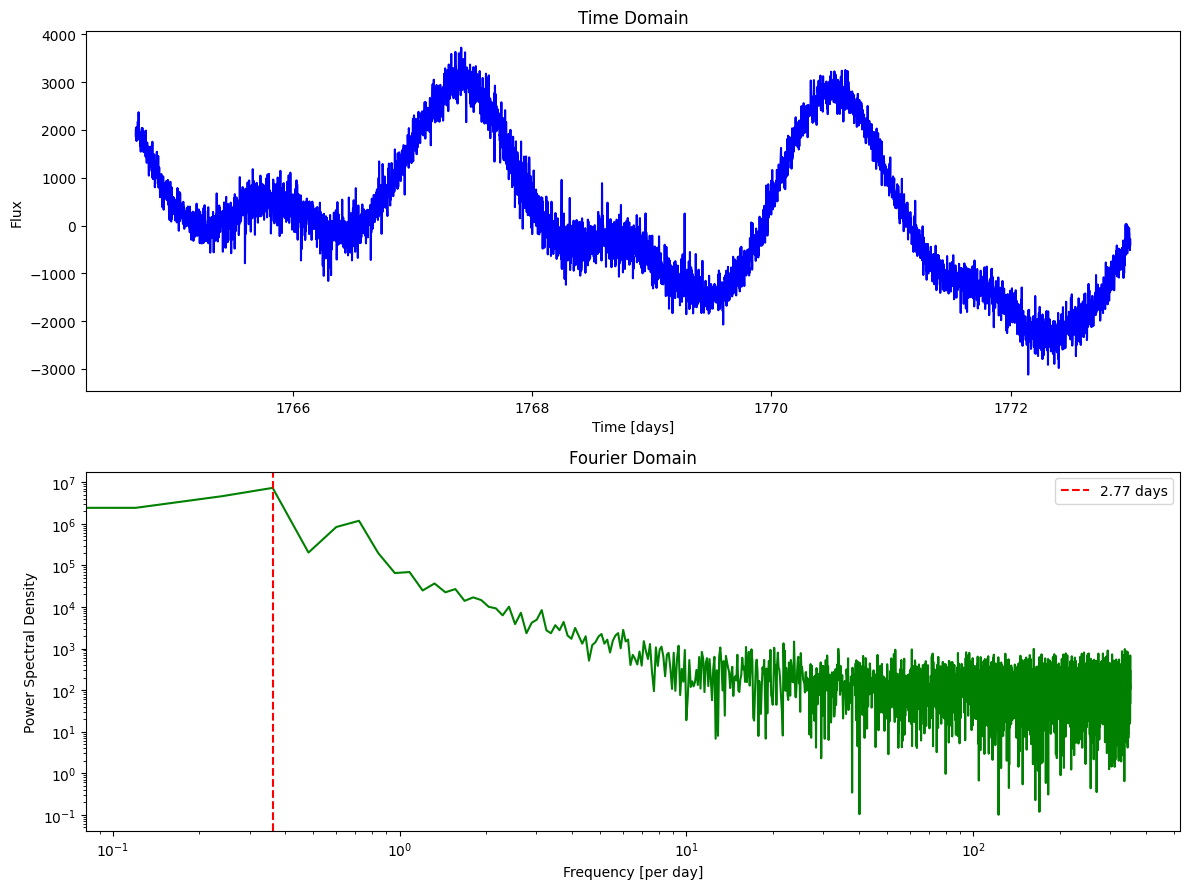

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


In [35]:
from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "2MASS J01562759+1224491"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")


TIC ID for 2MASS J01562759+1224491 is 404677344


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


[3208.35936245 3208.36075142 3208.36214038 ... 3233.82134696 3233.82273587
 3233.82412477]


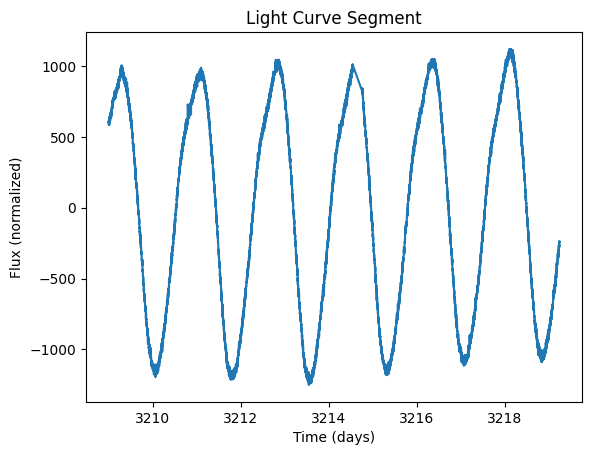

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 3209
t_end = 3219.4

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]



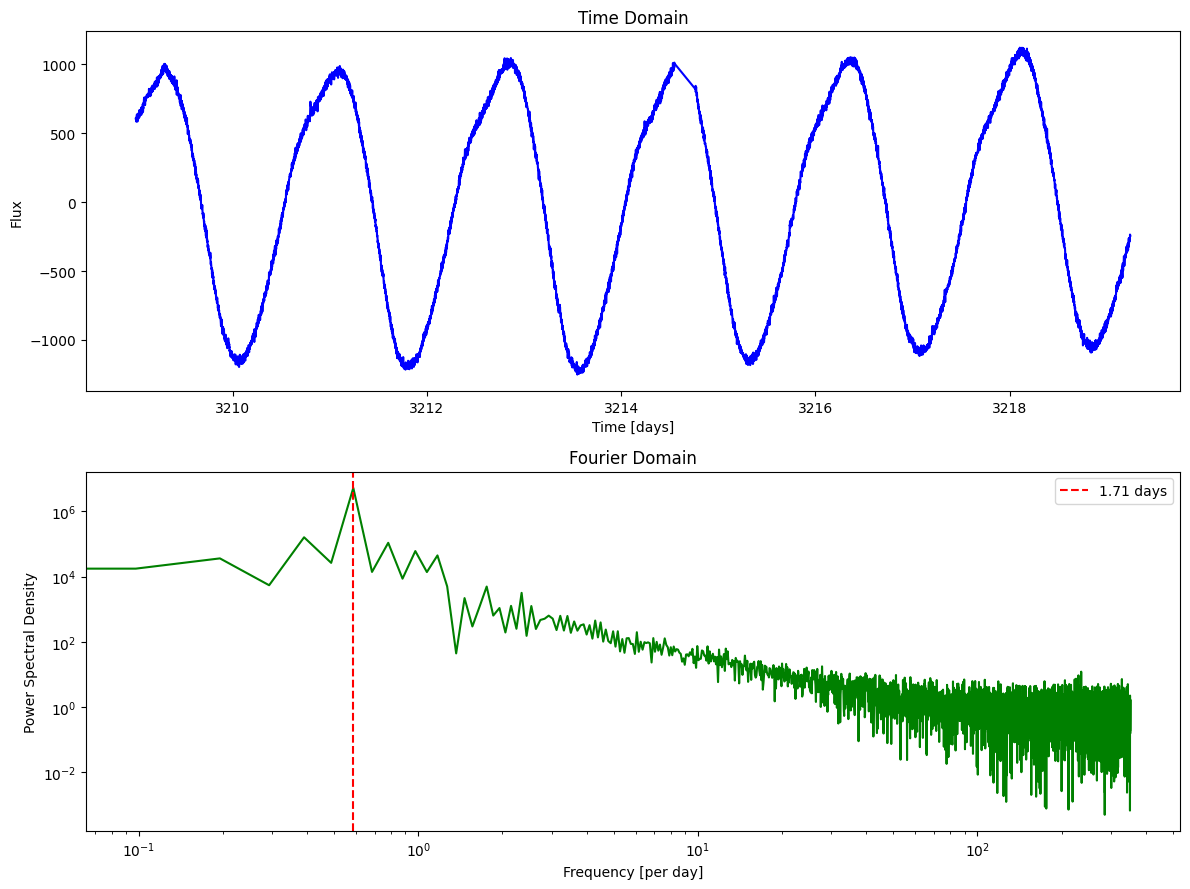

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


In [40]:

from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "HD 12039"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")


TIC ID for HD 12039 is 266746662


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 12 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


[1385.94071523 1385.94210415 1385.94349307 ... 1406.21589243 1406.21728131
 1406.21867019]


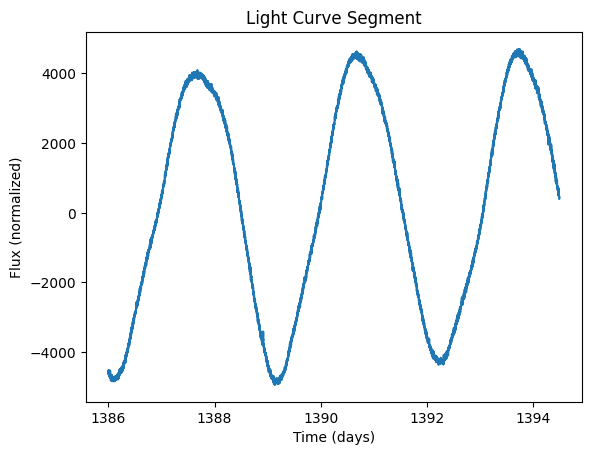

In [42]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1386
t_end = 1394.5

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]



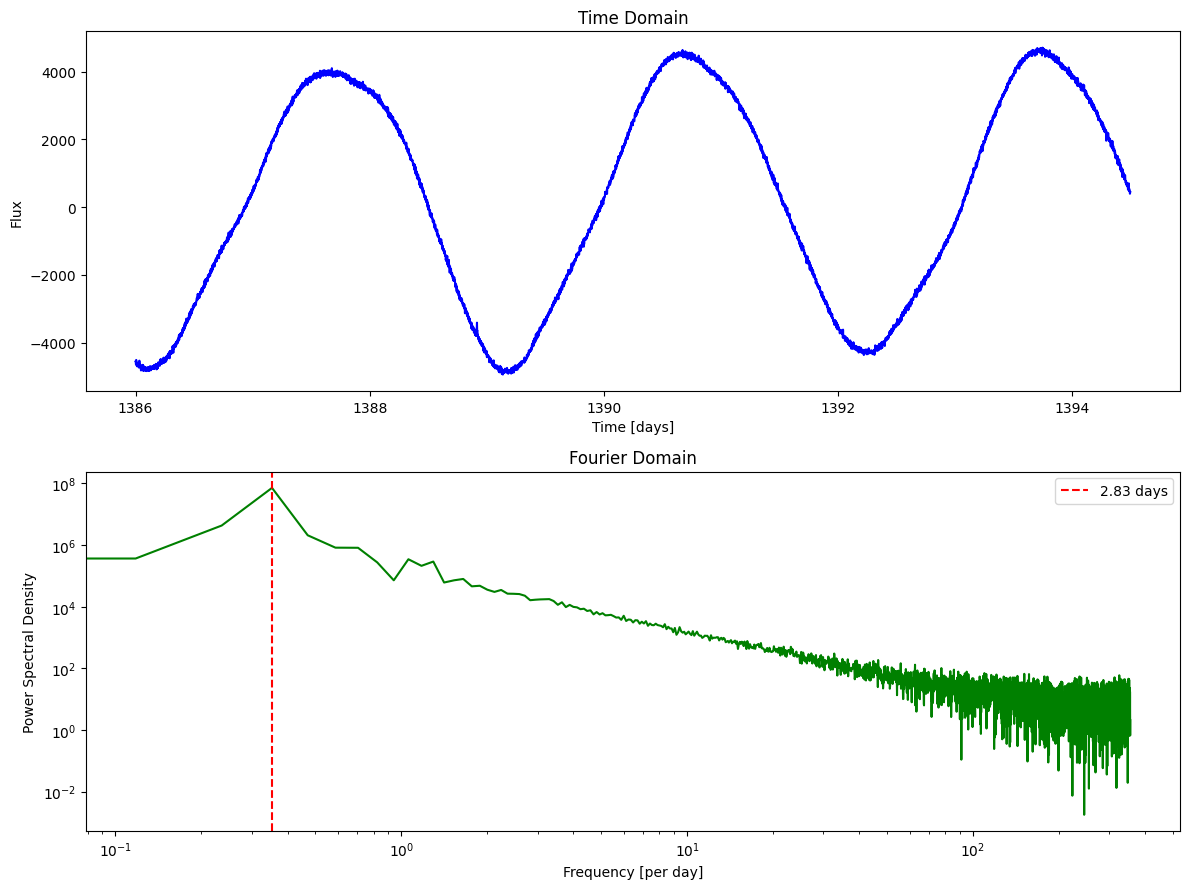

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


In [44]:

from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "GJ 83.1"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")


TIC ID for GJ 83.1 is 404715018


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 6 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


[3208.35930011 3208.36068908 3208.36207805 ... 3233.82132878 3233.82271769
 3233.8241066 ]


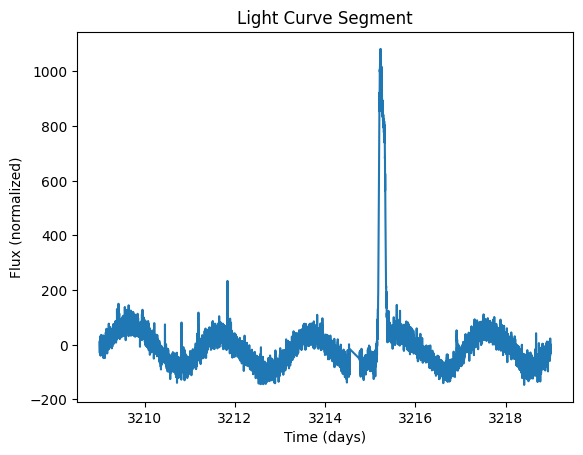

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 3209
t_end = 3219

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]



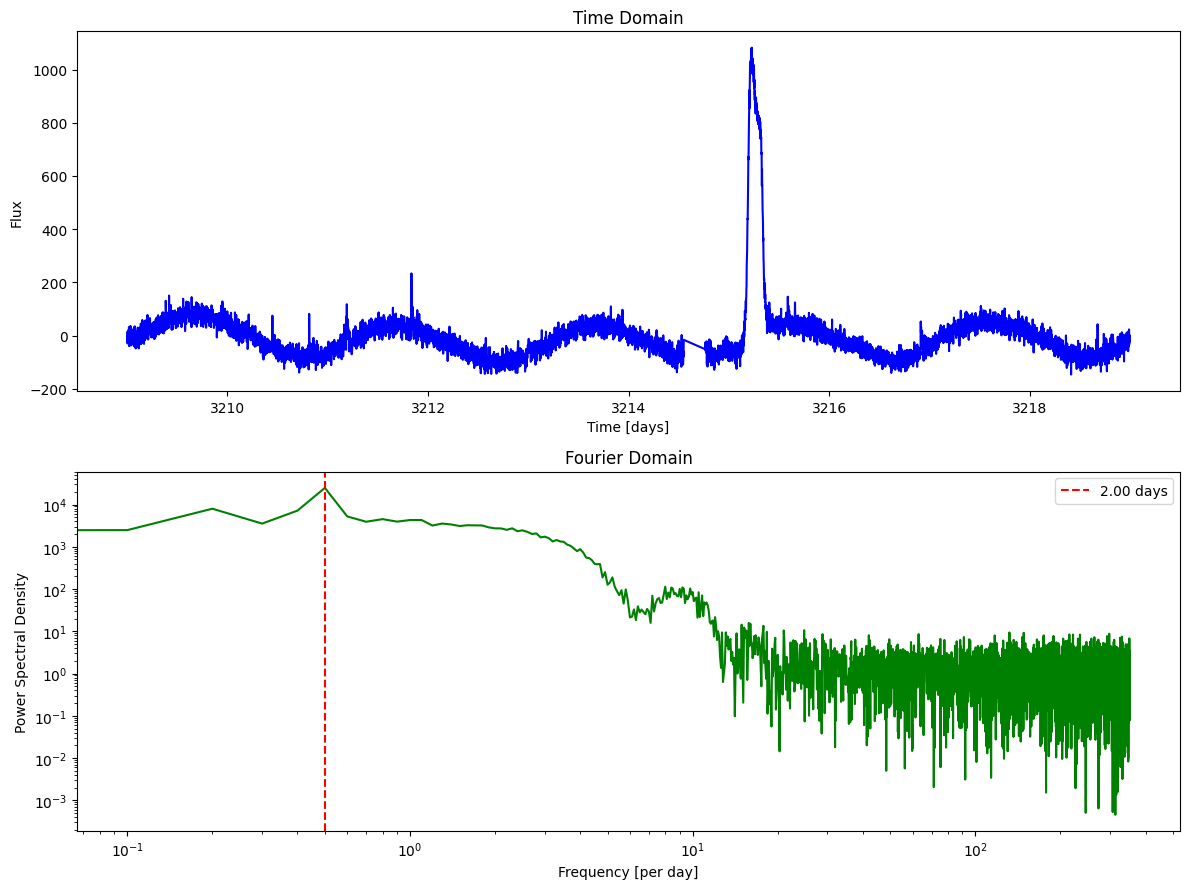

In [47]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


In [48]:

from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "CK_Tri"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")


TIC ID for CK_Tri is 286237897


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 5 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


[1790.66205562 1790.66344453 1790.66483344 ... 1815.03259287 1815.03398172
 1815.03537056]


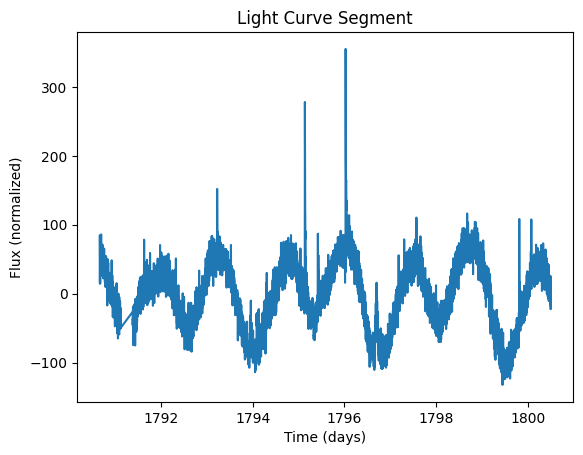

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1790.5
t_end = 1800.5

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]



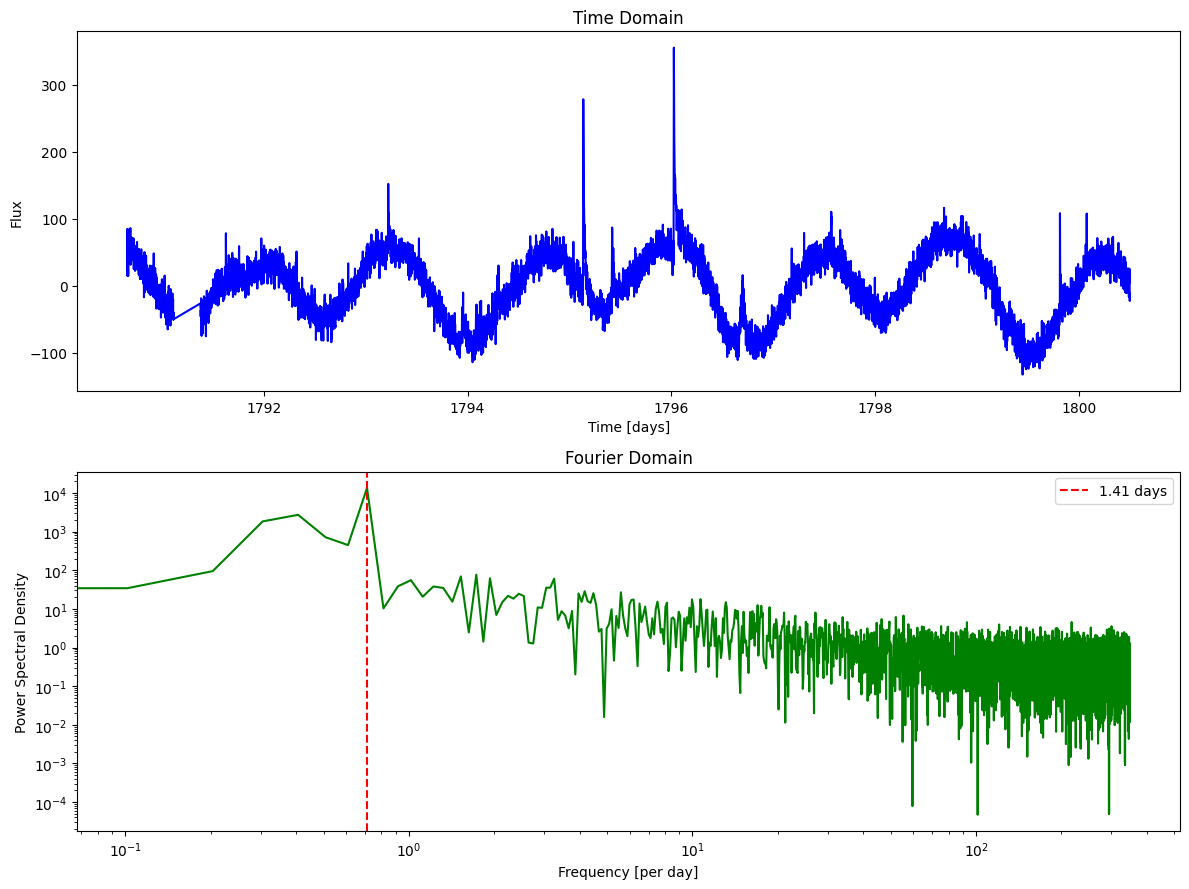

In [51]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


In [52]:


from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "GJ 103"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")


TIC ID for GJ 103 is 142206123


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 8 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


[1385.93926957 1385.94065848 1385.94204738 ... 1406.21429353 1406.21568241
 1406.21707128]


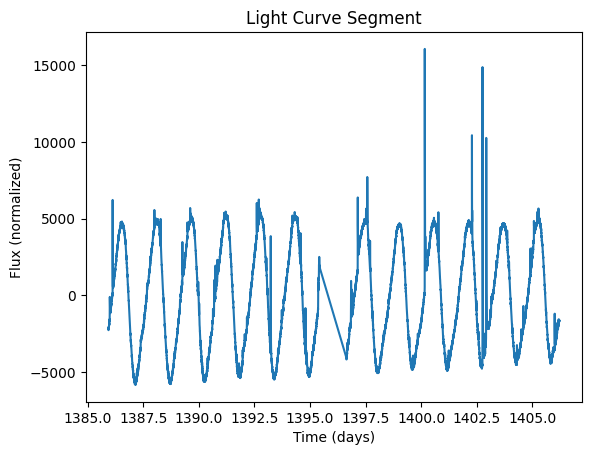

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1385.93
t_end = 1406.27

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]



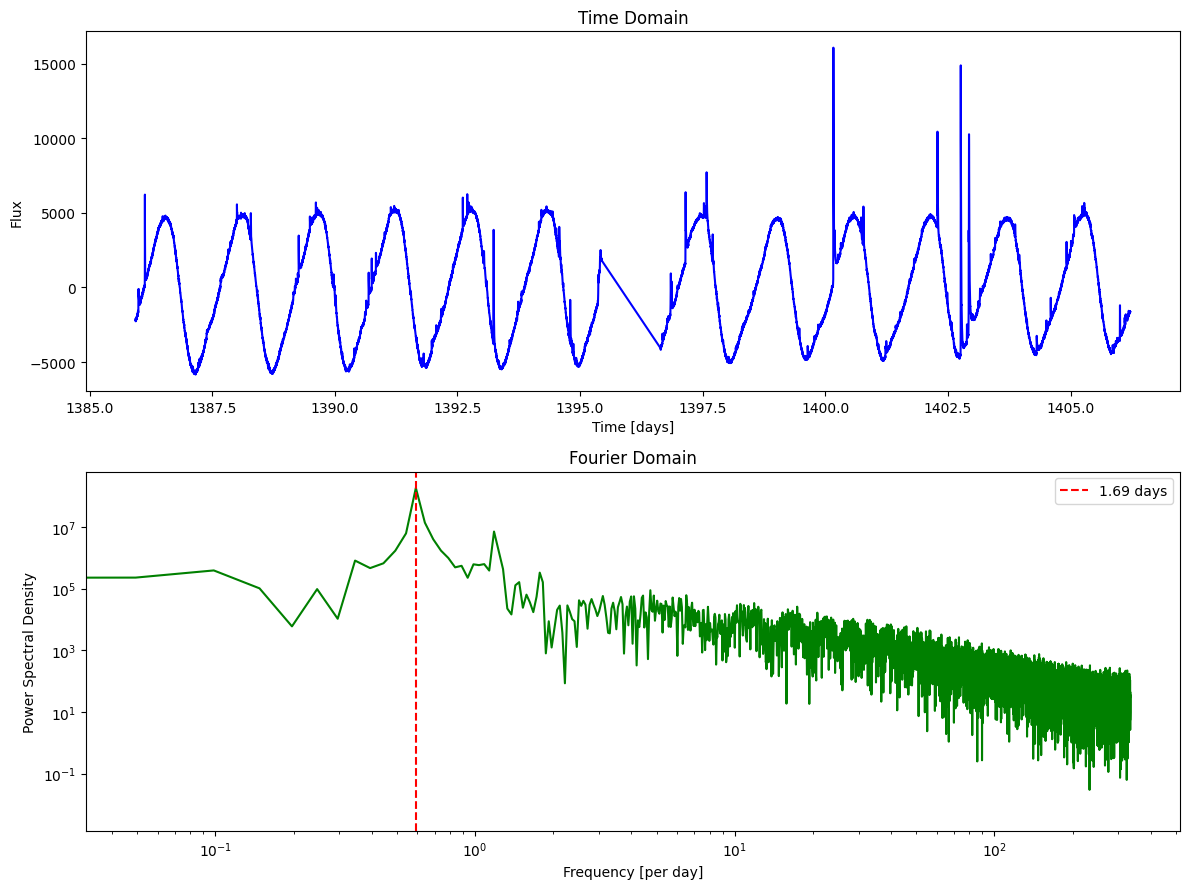

In [56]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


TIC ID for GJ 1054A is 88478727


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 10 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


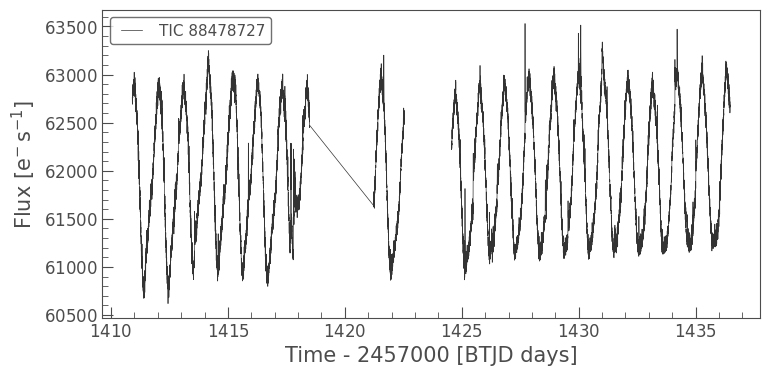

In [12]:


from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "GJ 1054A"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")
    




[1410.90678336 1410.90817227 1410.90956118 ... 1436.85102889 1436.85241775
 1436.8538066 ]


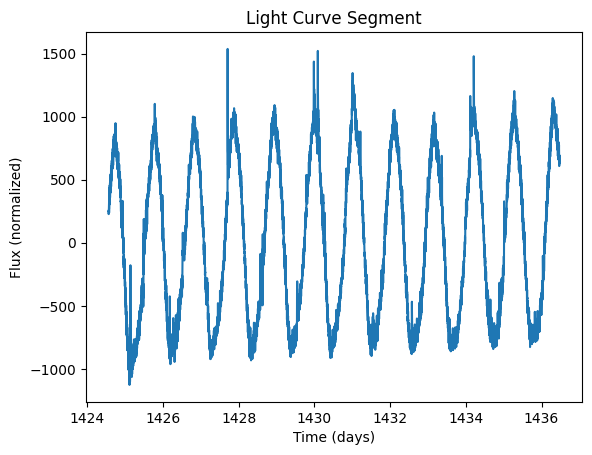

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1424.5
t_end = 1436.5

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]


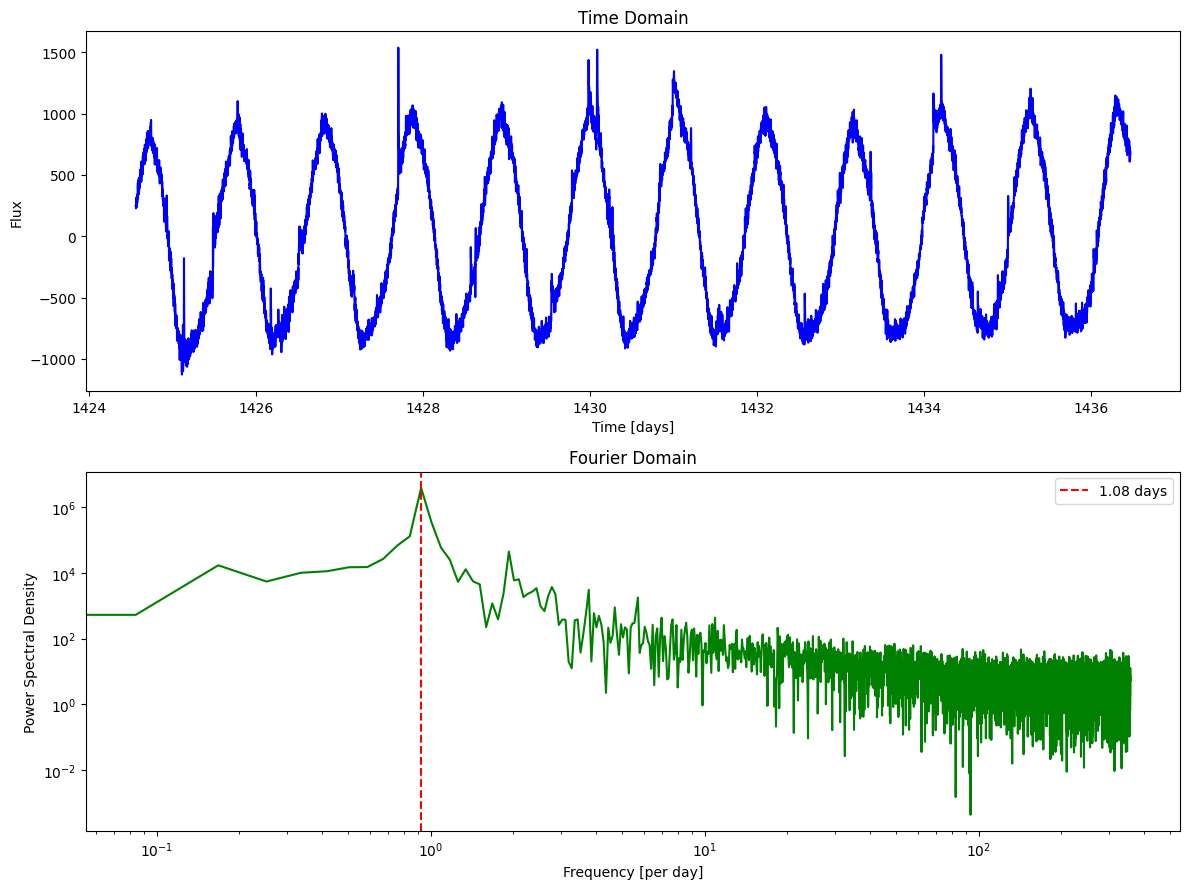

In [14]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


TIC ID for CK_Ari is 405415381


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 23 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


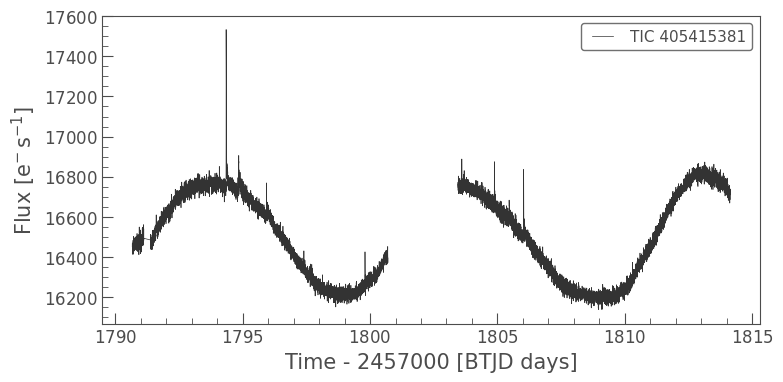

In [23]:



from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "CK_Ari"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")
    




[1790.66210983 1790.66349876 1790.66488769 ... 1815.03305691 1815.03444578
 1815.03583465]


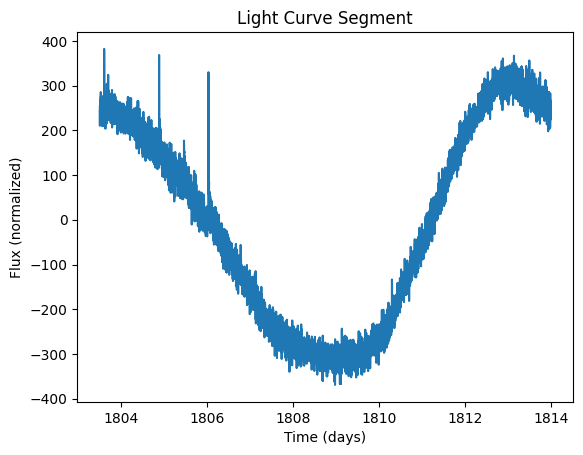

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1803.5
t_end = 1814

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]


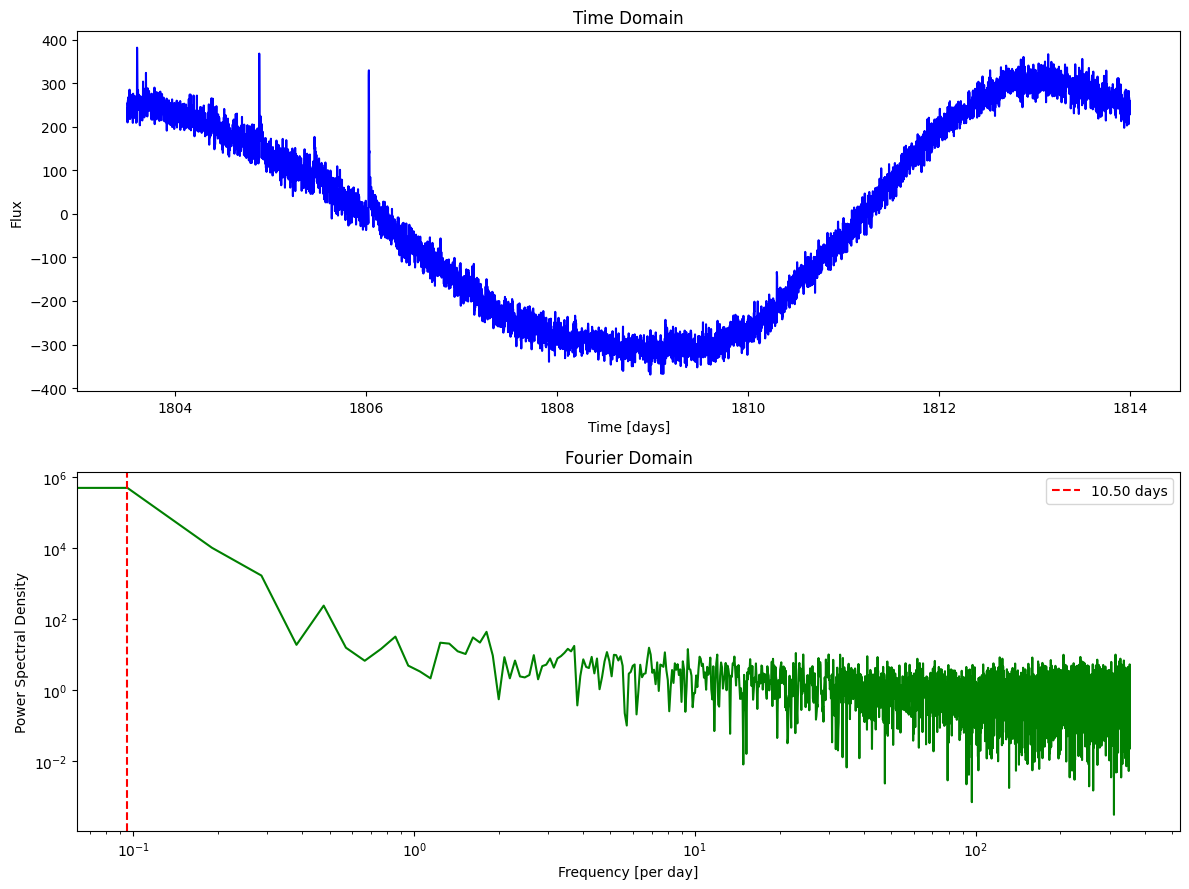

In [25]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


TIC ID for HD 22179 is 90766826


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 16 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


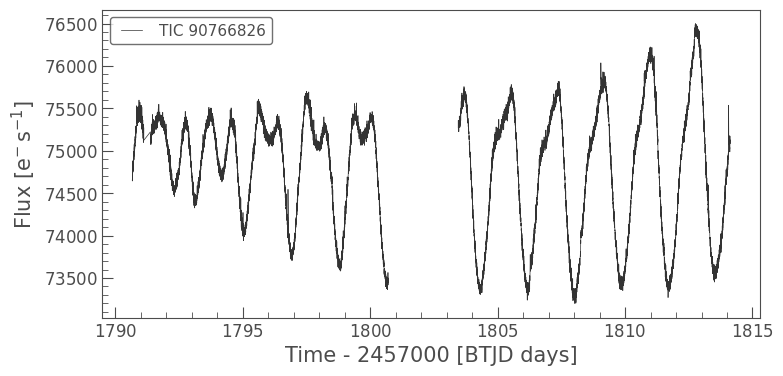

In [27]:




from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "HD 22179"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")
    




[1790.66197642 1790.66336536 1790.6647543  ... 1815.03303528 1815.03442415
 1815.03581303]


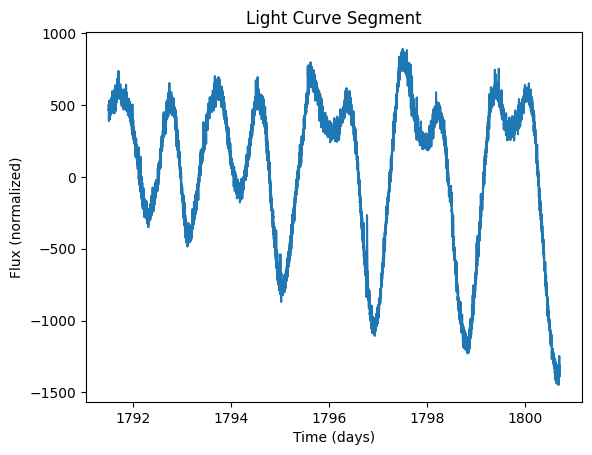

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1791.5
t_end = 1801.5

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]


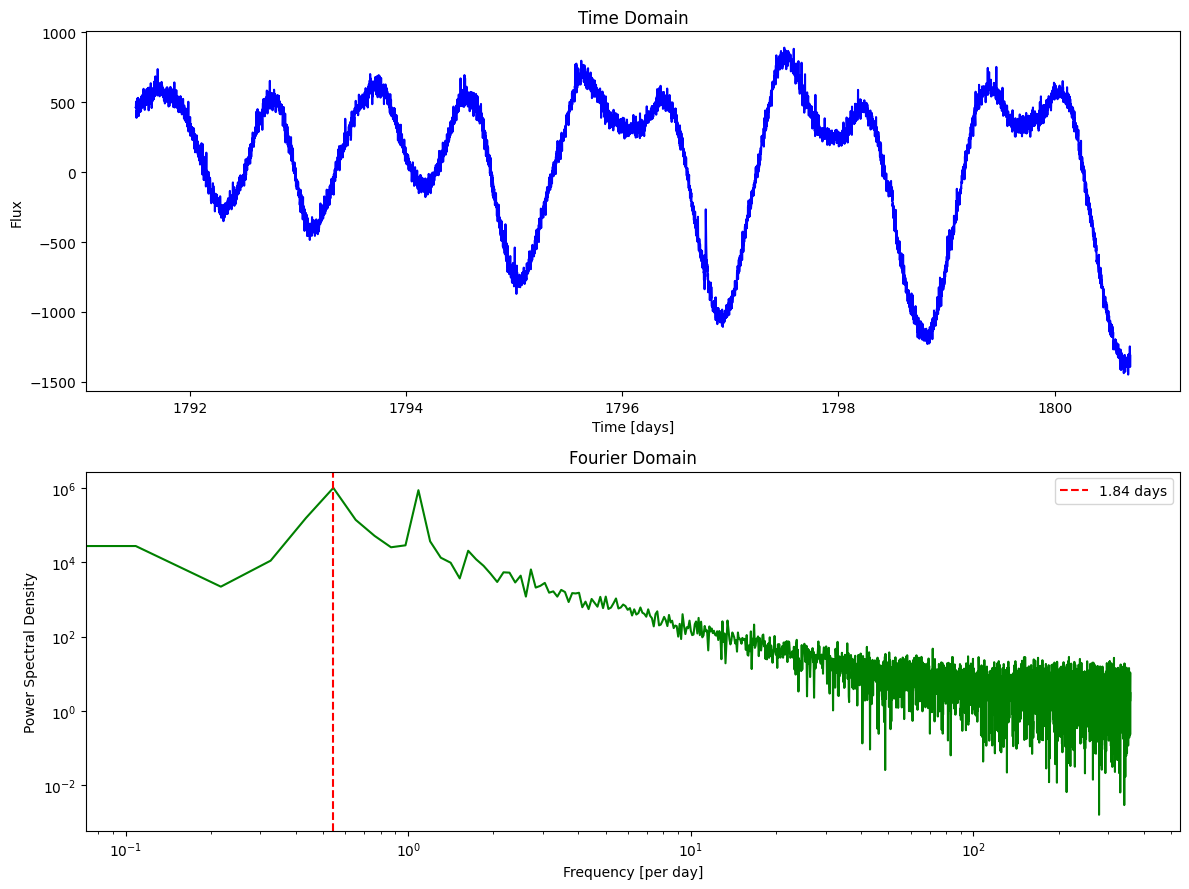

In [30]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


TIC ID for HD 285281 is 14254646


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 13 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


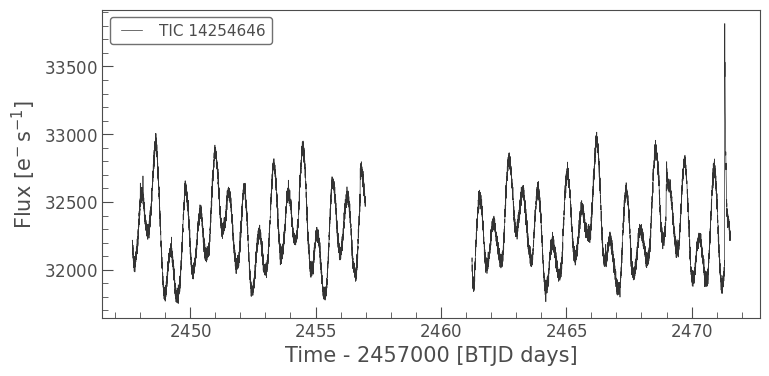

In [42]:





from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "HD 285281"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")
    




[2447.69067465 2447.69206368 2447.69345271 ... 2473.15839216 2473.15978117
 2473.16117018]


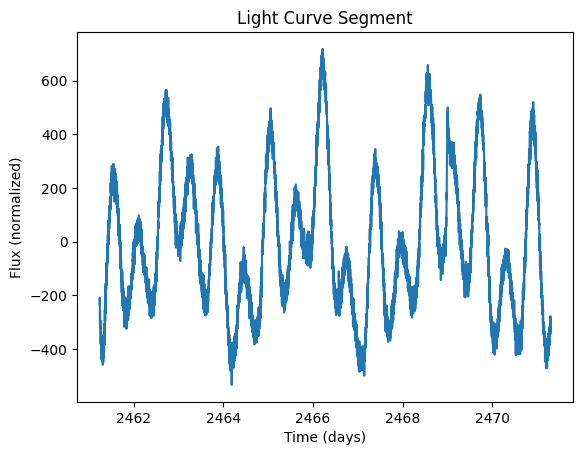

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 2461
t_end = 2471.3

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]


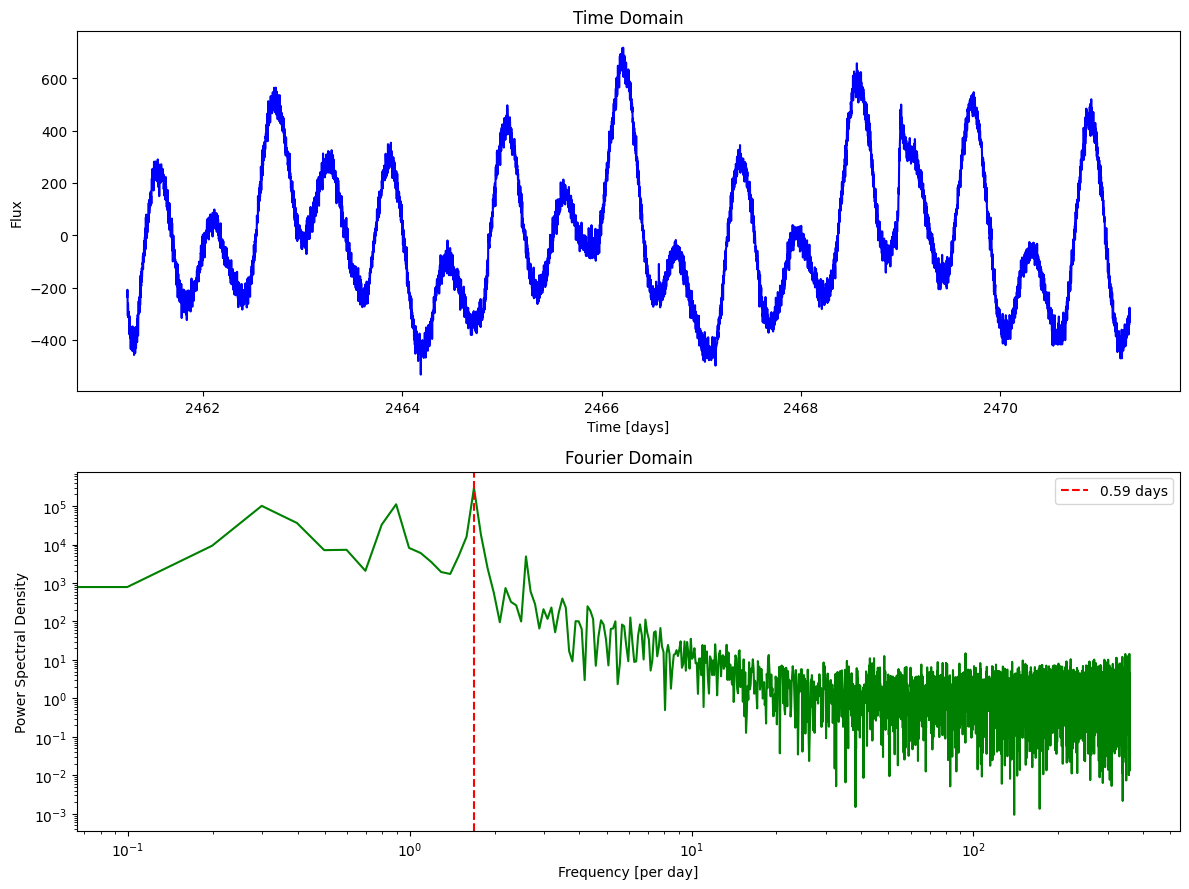

In [46]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


TIC ID for HD 285751 is 435937155


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 14 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


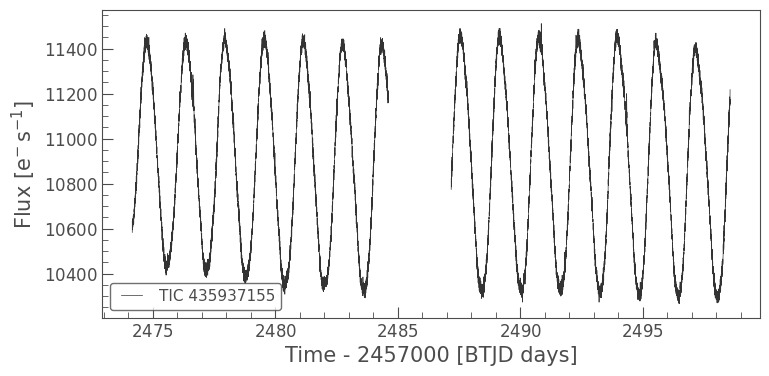

In [47]:





from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "HD 285751"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")
    




[2474.16913531 2474.17052434 2474.17191336 ... 2498.88927345 2498.89066243
 2498.89205142]


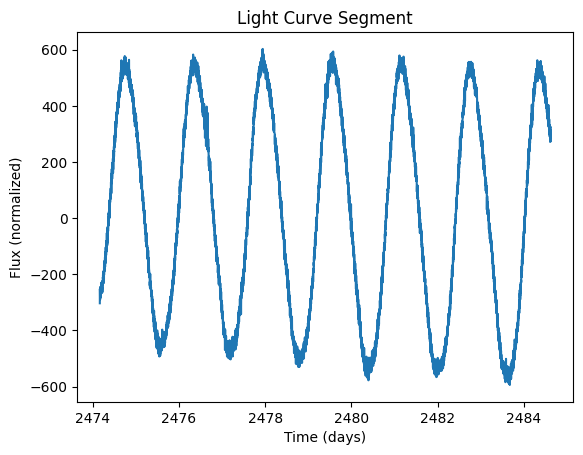

In [48]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 2474
t_end = 2485

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]


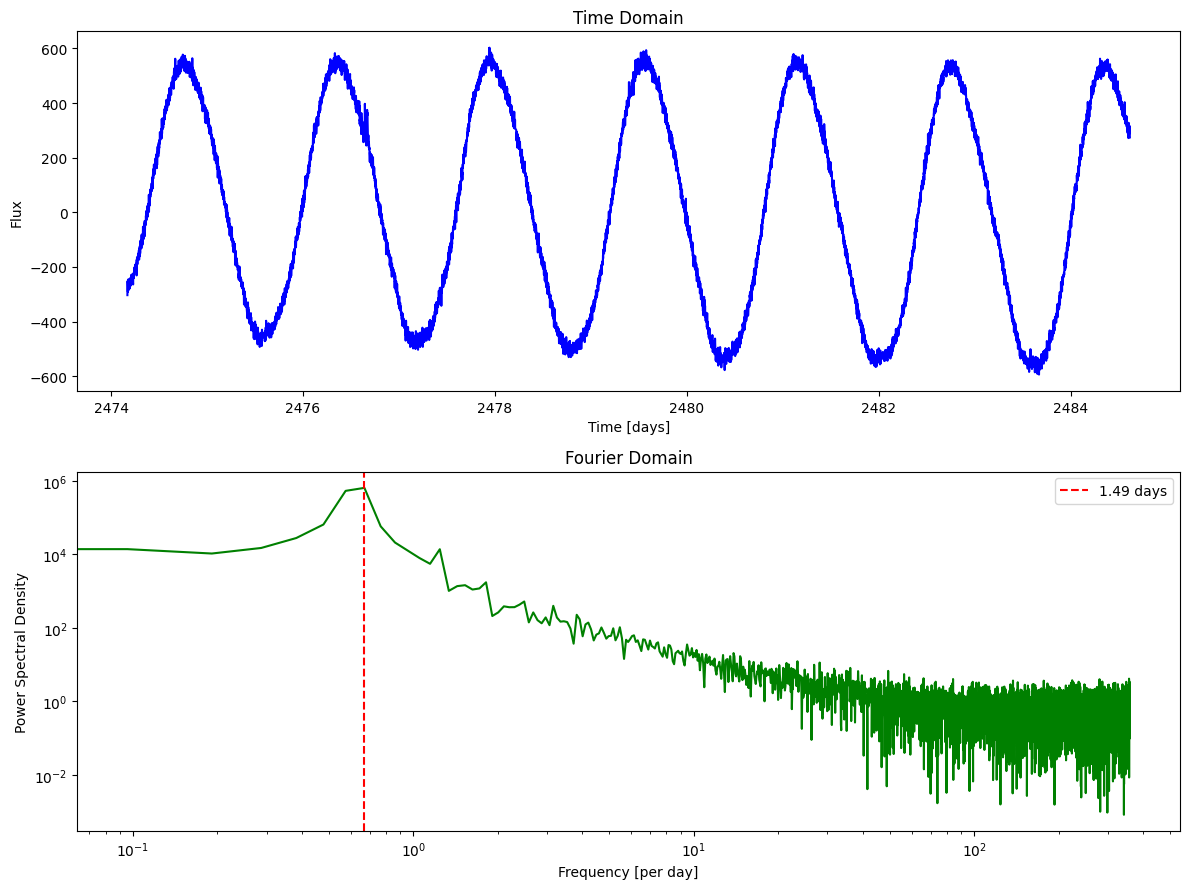

In [49]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


TIC ID for AO Men is 141914082


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 147 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


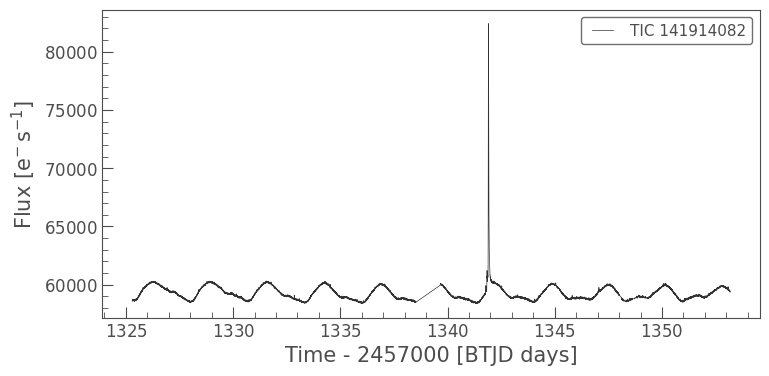

In [50]:






from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "AO Men"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")
    




[1325.2961209  1325.29750978 1325.29889866 ... 1353.17365476 1353.17504363
 1353.1764325 ]


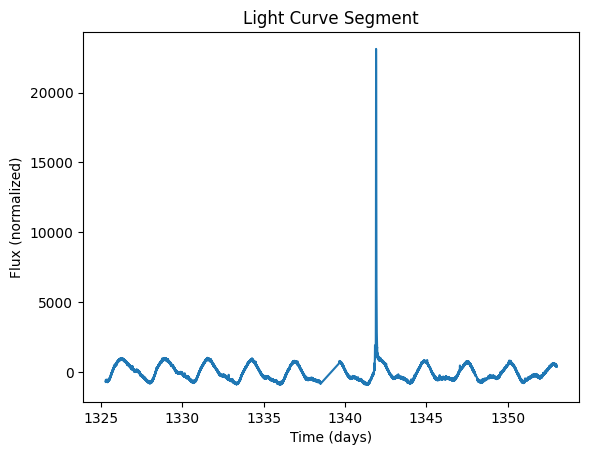

In [51]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1325
t_end = 1353

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]


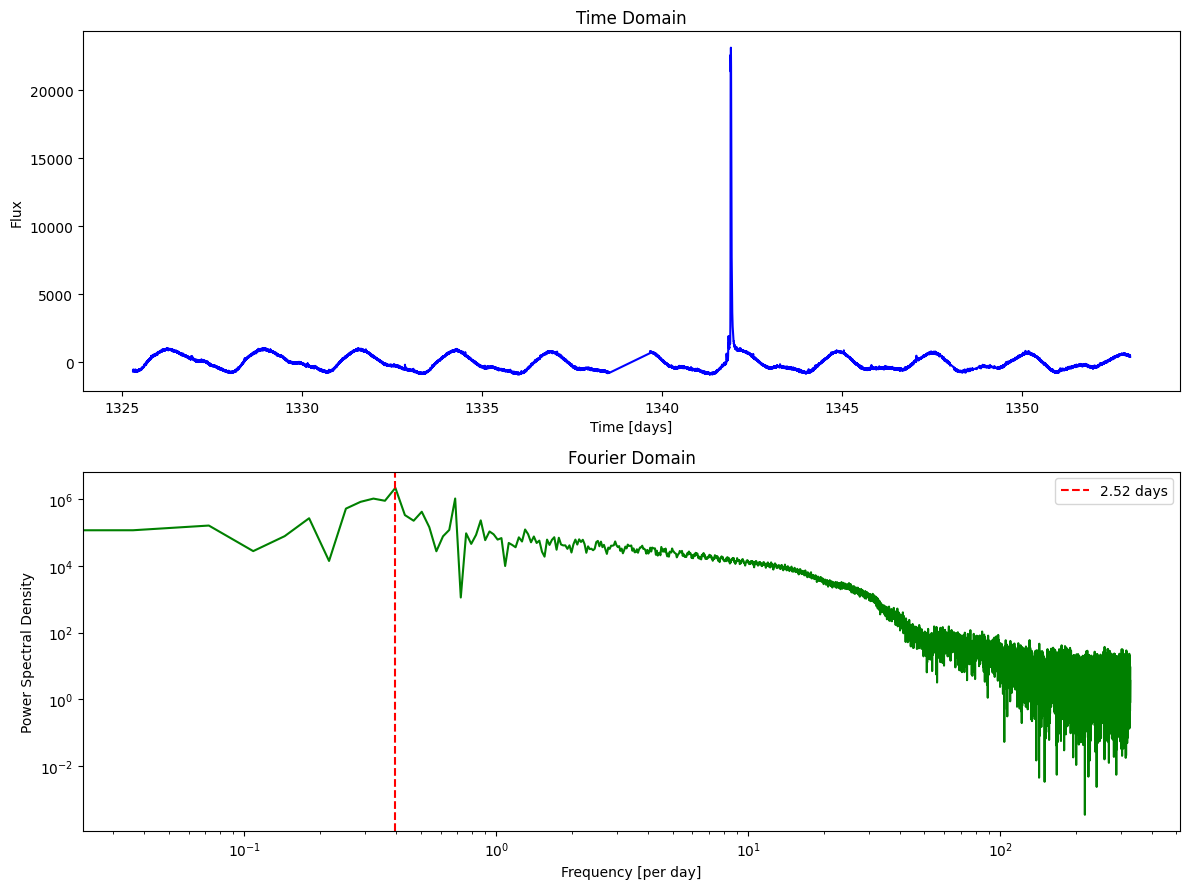

In [52]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


TIC ID for GJ 268 is 321103619


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 7 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


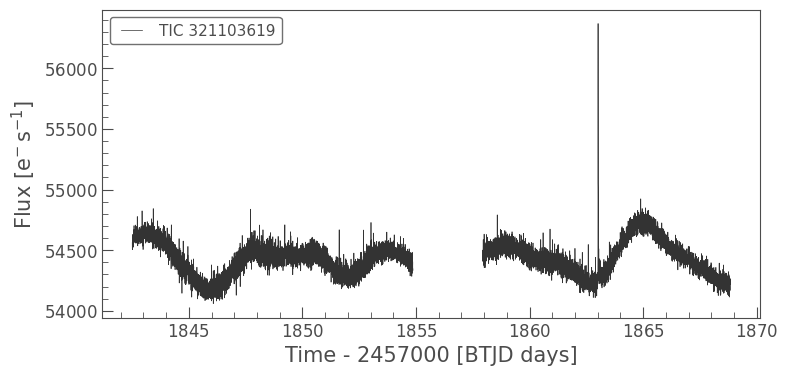

In [53]:







from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "GJ 268"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")
    




[1842.50923035 1842.51061927 1842.51200819 ... 1868.82441735 1868.8258062
 1868.82719505]


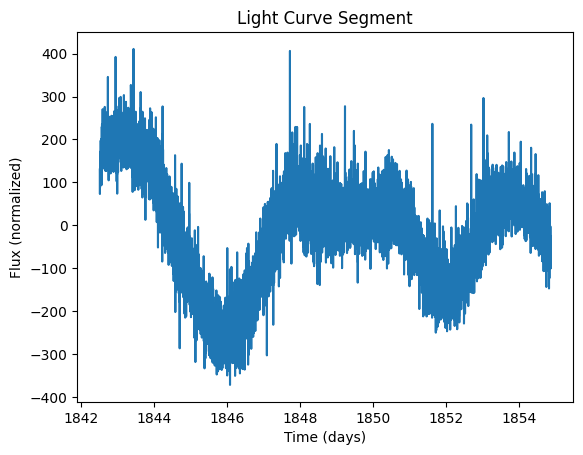

In [54]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1842.5
t_end = 1855

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]


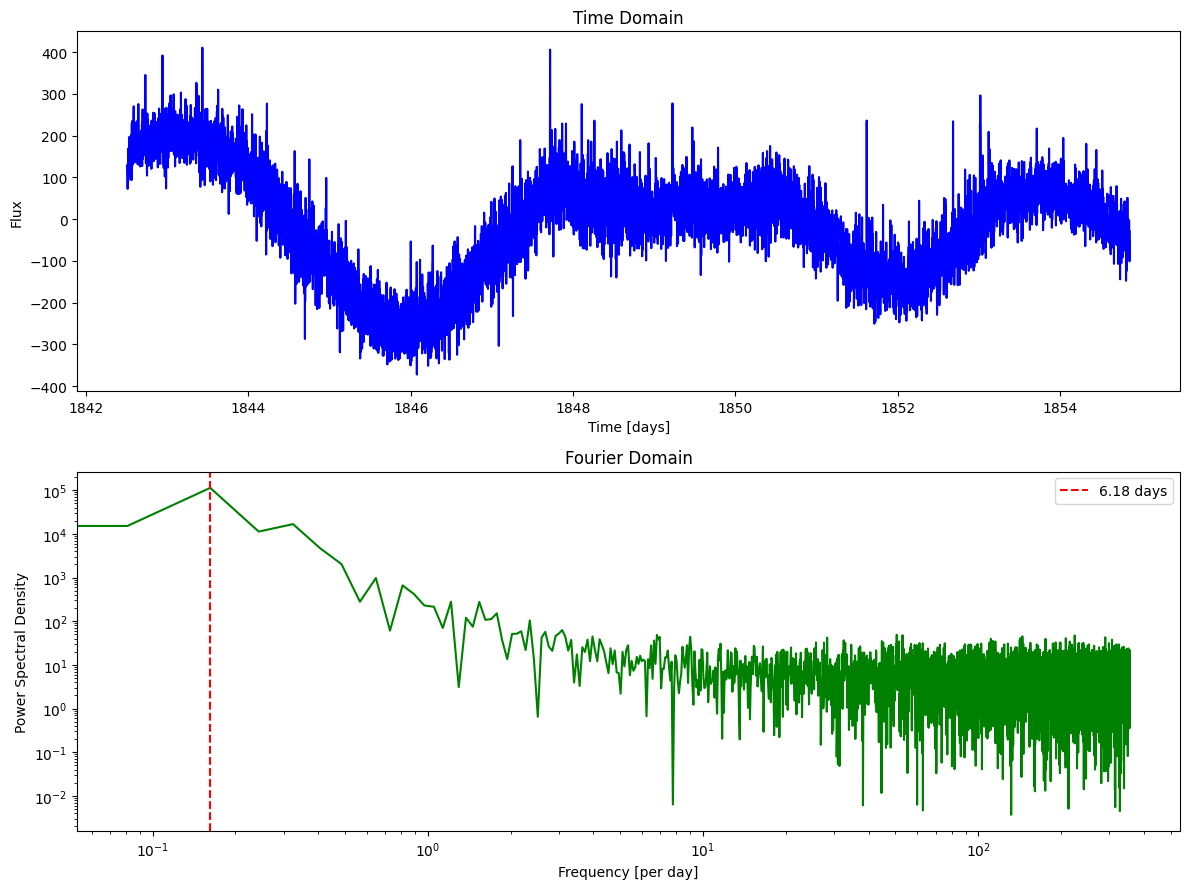

In [55]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()


TIC ID for HD 75393 is 114824306


C:\Users\Arghya Chaudhuri\AppData\Roaming\Python\Python311\site-packages\lightkurve\search.py:424: LightkurveWarning: Warning: 17 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


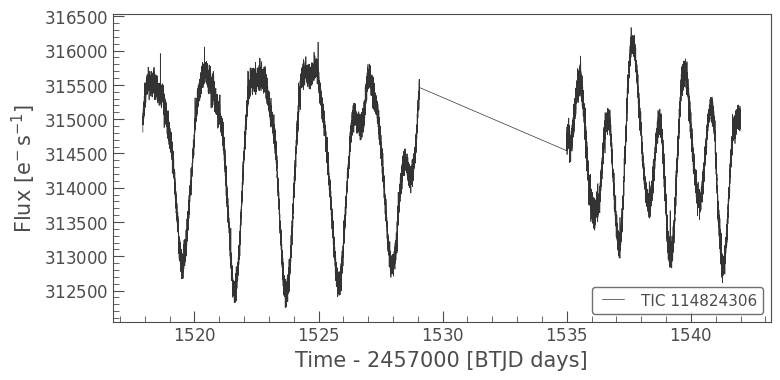

In [2]:

from astroquery.mast import Catalogs
import lightkurve as lk

# Replace with your HD ID
hd_id = "HD 75393"

# Query the MAST catalog to get the TIC ID
catalog_data = Catalogs.query_object(hd_id, catalog="TIC")
tic_id = catalog_data[0]['ID']

print(f"TIC ID for {hd_id} is {tic_id}")

# Now search for the lightcurve using the TIC ID
search_result = lk.search_lightcurve(f"TIC {tic_id}", mission="TESS")

# Download the light curve (if available)
if len(search_result) > 0:
    lc = search_result.download()
    lc.plot()
else:
    print("No TESS lightcurve data found for this target.")
    




[1517.3518684  1517.35464621 1517.35603512 ... 1542.00166903 1542.00305787
 1542.00444672]


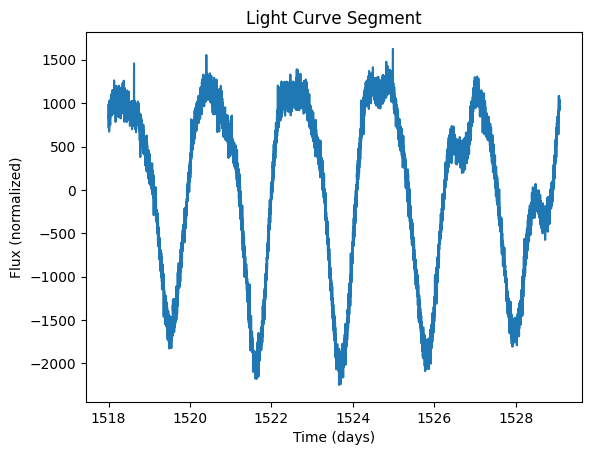

In [3]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft
time = lc.time.value  # Days
flux = lc.flux.value  # Normalized flux
flux = flux - np.mean(flux)  # Remove mean
print(time)

# Define time window
t_start = 1518
t_end = 1529.2

# Apply logical mask
mask = (time >= t_start) & (time <= t_end)

# Slice time and flux arrays
time_part = time[mask]
flux_part = flux[mask]
plt.plot(time_part, flux_part)
plt.xlabel('Time (days)')
plt.ylabel('Flux (normalized)')
plt.title('Light Curve Segment')
plt.show()


time=time_part
flux=flux_part
mask = ~np.isnan(flux)
flux = flux[mask]
time = time[mask]


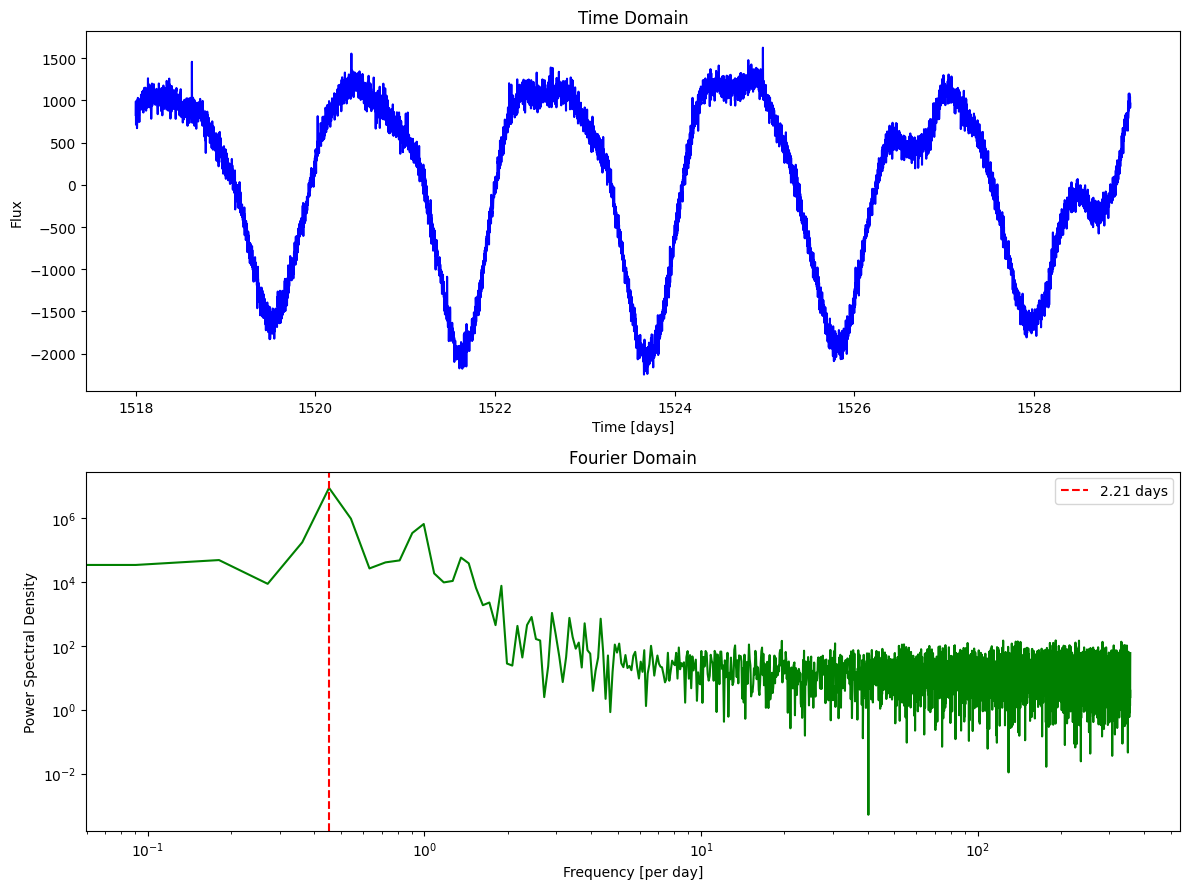

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import numpy.fft as fft

# Load Kepler light curve data
# lc = lk.search_lightcurve("KIC 7985370", mission="Kepler").download().remove_nans()

# Get time and flux


N = len(time)
Tobs = time[-1] - time[0]  # Total observation time in days
dt = np.median(np.diff(time))  # Sampling interval in days
sps = 1 / dt  # samples per day

# FFT
fy = fft.fft(flux)
df = 1 / Tobs  # frequency resolution
f = np.arange(0, N // 2) * df  # frequency array

# Compute PSD
psd = (np.abs(fy[:N // 2]) * 2 / N)**2
psd = psd / (2 * df)  # normalize PSD

# Plotting
fig, ax = plt.subplots(2, 1, figsize=(12, 9))

# Time domain plot
ax[0].plot(time, flux, color='blue')
ax[0].set_xlabel('Time [days]')
ax[0].set_ylabel('Flux')
ax[0].set_title('Time Domain')

# Fourier domain plot
ax[1].loglog(f, psd, color='green')
ax[1].set_xlabel('Frequency [per day]')
ax[1].set_ylabel('Power Spectral Density')
ax[1].set_title('Fourier Domain')

# Find and annotate dominant frequency
dominant_freq = f[np.argmax(psd)]
dominant_period = 1 / dominant_freq
ax[1].axvline(x=dominant_freq, color='red', linestyle='--', lw=1.5, label=f'{dominant_period:.2f} days')
ax[1].legend()

plt.tight_layout()
plt.show()
